We consider a simple neural network that performs regression based on $y = \sin x$, using the package Lux.jl.

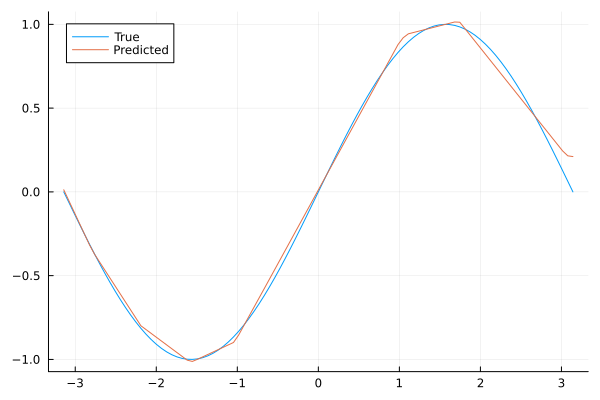

In [1]:
using Lux, Random, Optimization, OptimizationOptimisers, ComponentArrays, Zygote, Plots, LinearAlgebra

# Define data for regression
n = 100
x = range(-π, π; length = n)
y = sin.(x)

# Define a neural network model
model = Chain(
    Dense(1 => 10, relu),
    Dense(10 => 10, relu),
    Dense(10 => 1)
)

# Define the loss function based on 2-norm
function regression_loss(ps, (model, st, (x, y)))
    ŷ = vec(model(x', ps, st)[1])
    return norm(ŷ - y)
end

# Setup the neural network
rng = MersenneTwister()
ps, st = Lux.setup(rng, model)

# Define and solve the optimization problem
prob = OptimizationProblem(OptimizationFunction(regression_loss, Optimization.AutoZygote()), ComponentArray(ps), (model, st, (x, y)))
ret = solve(prob, Adam(0.03), maxiters = 250)

# Plot the results
plot(x, y, label = "True")
plot!(x, vec(model(x', ret.u, st)[1]), label = "Predicted")

We now consider another simple neural network that does number recognition based on the MNIST dataset, using another package FLux.jl.

[Reference: https://github.com/piotrek124-1/Simple_MNIST_Julia/tree/main]

In [1]:
using Flux, MLDatasets

# Import the MNIST dataset
x_train, y_train = MLDatasets.MNIST.traindata(Float32)
x_test, y_test = MLDatasets.MNIST.testdata(Float32)

# Flatten the images
x_train_flat = Flux.flatten(x_train)
x_test_flat = Flux.flatten(x_test)

# Use one-hot encoding for the labels
y_train_oh = Flux.onehotbatch(y_train, 0:9)

# Define a neural network model
model = Chain(
    Dense(28*28, 196, relu),
    Dense(196, 49, relu),
    Dense(49, 10)
)

# Define the loss function based on cross entropy
loss(x, y) = Flux.Losses.logitcrossentropy(model(x), y)

# Train the neural network
dataset = [(x_train_flat, y_train_oh)]
for epoch in 1:25
    Flux.train!(loss, Flux.params(model), dataset, Adam(0.003))
end

# Print the test accuracy
sum(Flux.onecold(model(x_test_flat)) .== (y_test .+ 1)) / length(y_test)

0.7978